<a href="https://colab.research.google.com/github/brahmapearl/HumanPortraitClassificationVGG16/blob/main/HumanPortraitClassificationVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/binary.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [4]:
# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32


In [5]:
data_dir = '/content/binary'

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [7]:

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 35367 images belonging to 2 classes.
Found 8841 images belonging to 2 classes.


In [8]:
# Load pre-trained VGG-16 model
vgg16_model = VGG16(input_shape=(224,224, 3))

553467096/553467096 [==============================] - 3s 0us/step


In [9]:
# Add custom layers for classification
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(units=2, activation='sigmoid'))

# Freeze pre-trained layers
for layer in vgg16_model.layers:
   layer.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________


In [11]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
H = model.fit_generator(steps_per_epoch=30,generator=train_data,validation_steps=2,validation_data=val_data,epochs=50,verbose=1,shuffle=True)

<ipython-input-12-68ff80a449bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(steps_per_epoch=30,generator=train_data,validation_steps=2,validation_data=val_data,epochs=50,verbose=1,shuffle=True)


Epoch 1/50
30/30 [==============================] - 28s 461ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.4375
Epoch 2/50
30/30 [==============================] - 14s 448ms/step - loss: 0.6922 - accuracy: 0.5729 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/50
30/30 [==============================] - 13s 446ms/step - loss: 0.6920 - accuracy: 0.5521 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 4/50
30/30 [==============================] - 14s 450ms/step - loss: 0.6910 - accuracy: 0.6656 - val_loss: 0.6915 - val_accuracy: 0.6406
Epoch 5/50
30/30 [==============================] - 13s 448ms/step - loss: 0.6904 - accuracy: 0.6677 - val_loss: 0.6898 - val_accuracy: 0.7031
Epoch 6/50
30/30 [==============================] - 13s 450ms/step - loss: 0.6896 - accuracy: 0.7042 - val_loss: 0.6881 - val_accuracy: 0.7188
Epoch 7/50
30/30 [==============================] - 14s 477ms/step - loss: 0.6889 - accuracy: 0.6802 - val_loss: 0.6904 - val_accuracy: 0.6406

In [13]:
test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=128,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 8841 images belonging to 2 classes.


In [14]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

70/70 [==============================] - 131s 2s/step - loss: 0.6624 - accuracy: 0.7313
Test Loss: 0.6623890399932861
Test Accuracy: 0.731252133846283


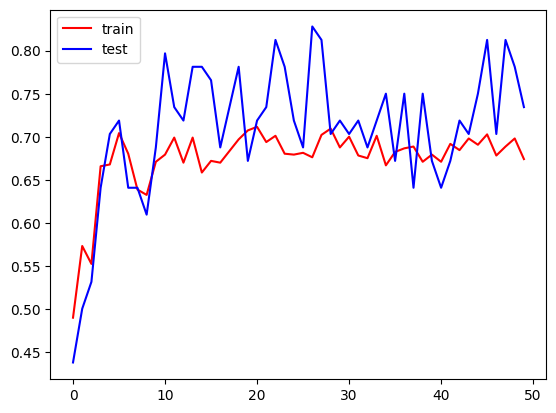

In [15]:
import matplotlib.pyplot as plt

plt.plot(H.history['accuracy'],color='red',label='train')
plt.plot(H.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

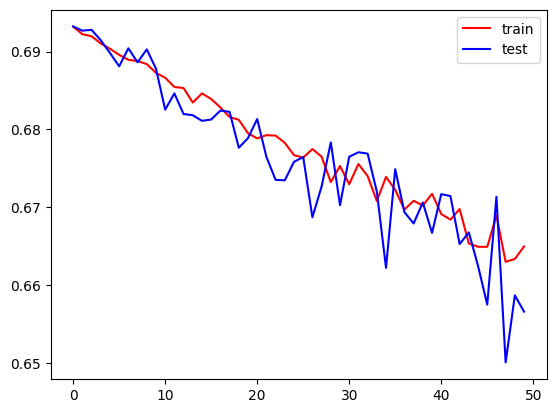

In [16]:

plt.plot(H.history['loss'],color='red',label='train')
plt.plot(H.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()